# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline



Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



Реализуем класс нейронной сети в стиле scikit-learn

In [2]:
class NeuralNetwork:
    def __init__(self, in_size, hid_size, out_size, rate=0.1):
        
        self.params = {
            'W1': np.random.randn(in_size, hid_size),
            'b1': np.zeros(hid_size),
            'W2': np.random.randn(hid_size, out_size),
            'b2': np.zeros(out_size),
        }
        self.lear = rate

    def sigma(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        u = np.dot(x, self.params['W1']) + self.params['b1']
        z = self.sigma(u)
        y = np.dot(z, self.params['W2']) + self.params['b2']
        self.cache = (x, u, z, y)
        return y

    def backward(self, dy):
        x, u, z, y = self.cache
        du = dy
        dW2 = np.dot(z.T, du) / len(x)
        db2 = np.sum(du, axis=0) / len(x)
        dz = np.dot(du, self.params['W2'].T)
        du = dz * z * (1 - z)
        dW1 = np.dot(x.T, du) / len(x)
        db1 = np.sum(du, axis=0) / len(x)
        self.grads = {'W1':dW1, 'b1':db1, 'W2':dW2, 'b2':db2}

    def update(self):
        self.params['W1'] -= self.lear * self.grads['W1']
        self.params['b1'] -= self.lear * self.grads['b1']
        self.params['W2'] -= self.lear * self.grads['W2']
        self.params['b2'] -= self.lear * self.grads['b2']

    def fit(self, X, y, num =100, batch_size=32):
        num_batches = len(X) // batch_size
        for epoch in range(num):
            idx = np.random.permutation(len(X))
            for i in range(num_batches):
                batch_idx = idx[i*batch_size:(i+1)*batch_size]
                X_batch = X[batch_idx]
                y_batch = y[batch_idx]
                y_pred = self.forward(X_batch)
                ny = y_pred - y_batch
                self.backward(ny)
                self.update()

    def predict(self, X):
        y_pred = self.forward(X)
        return y_pred

Сгенерируем данные. Возьмем какую-либо нелинейную функцию $y(x)$.

In [15]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))

y = np.sin(X[:,0]) + 0.5*np.exp(-X[:,0]**2)
assert y.shape == (sample_size,) 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим нейронную сеть на этих данных, а также простую линейную регрессию. Для линейной регрессии возьмем реализацию из `sklearn`.

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
nn = NeuralNetwork(1, 10, 1)
nn.fit(X_train, y_train, num=100, batch_size=1000)

Визуализируем предсказания данных моделей и посчитаем MSE на тестовой части данных.

In [19]:
from sklearn.metrics import mean_squared_error

y_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_lr)

y_nn = nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_nn)
#mse = np.mean((y_nn - y_test)**2)

print(f"MSE линейной регрессии: {mse_lr:.4f}")
print(f"MSE нейронной сети: {mse_nn:.4f}")

MSE линейной регрессии: 0.0925
MSE нейронной сети: 2.7158


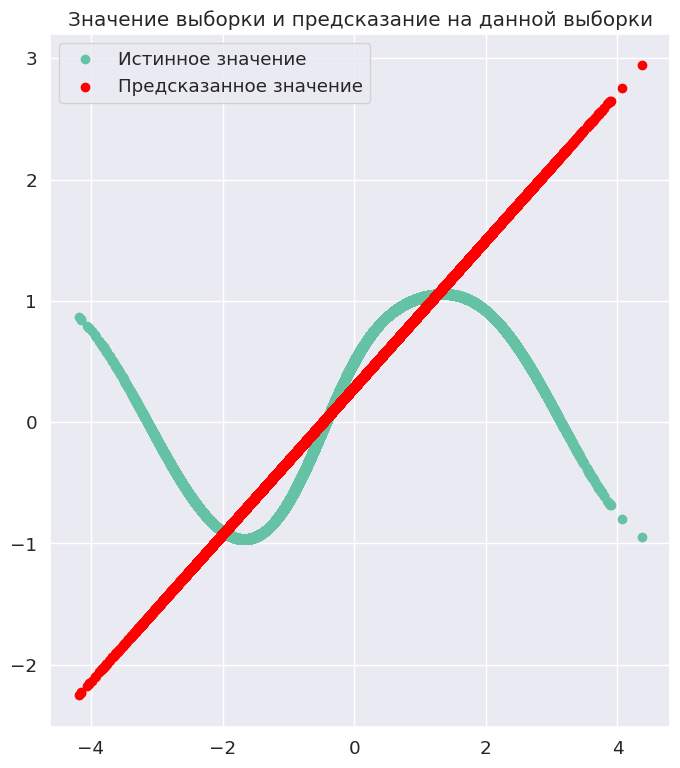

In [20]:
plt.figure(figsize=(8,9))
plt.scatter(X_test, y_test, label='Истинное значение')
plt.scatter(X_test, y_lr, color='red', label='Предсказанное значение')
plt.legend(loc='upper left')
plt.title('Значение выборки и предсказание на данной выборки')
plt.show()

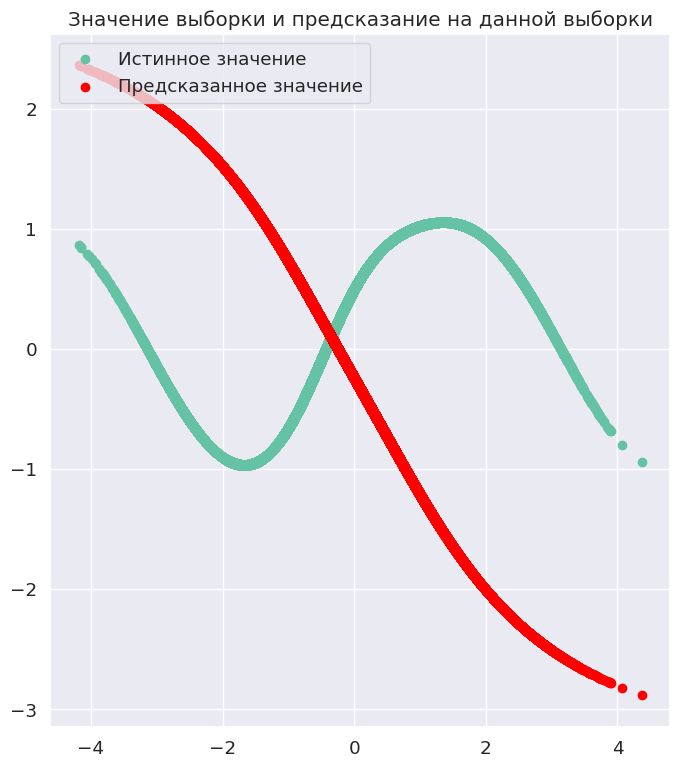

In [21]:
plt.figure(figsize=(8,9))
plt.scatter(X_test, y_test, label='Истинное значение')
plt.scatter(X_test, y_nn, color='red', label='Предсказанное значение')
plt.legend(loc='upper left')
plt.title('Значение выборки и предсказание на данной выборки')
plt.show()

Повторим вычисления для другой нелинейной функции $y(x)$.

In [3]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.sin(X[:,0]) + X[:,0]**2 + 0.5*X[:,0] + 1.5*np.sin(3*X[:,0]) + 2*np.cos(5*X[:,0])

assert y.shape == (sample_size,) 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
nn = NeuralNetwork(1, 10, 1)
nn.fit(X_train, y_train, num=100, batch_size=1000)

In [9]:
from sklearn.metrics import mean_squared_error

y_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_lr)

y_nn = nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_nn)
#mse = np.mean((y_nn - y_test)**2)

print(f"MSE линейной регрессии: {mse_lr:.4f}")
print(f"MSE нейронной сети: {mse_nn:.4f}")

MSE линейной регрессии: 5.3436
MSE нейронной сети: 8.2438


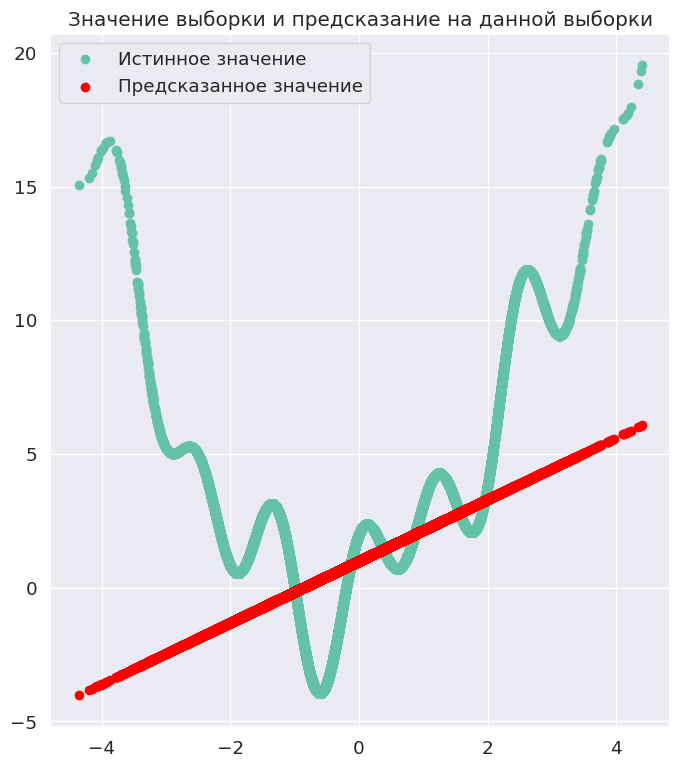

In [13]:
plt.figure(figsize=(8,9))
plt.scatter(X_test, y_test, label='Истинное значение')
plt.scatter(X_test, y_lr, color='red', label='Предсказанное значение')
plt.legend(loc='upper left')
plt.title('Значение выборки и предсказание на данной выборки')
plt.show()

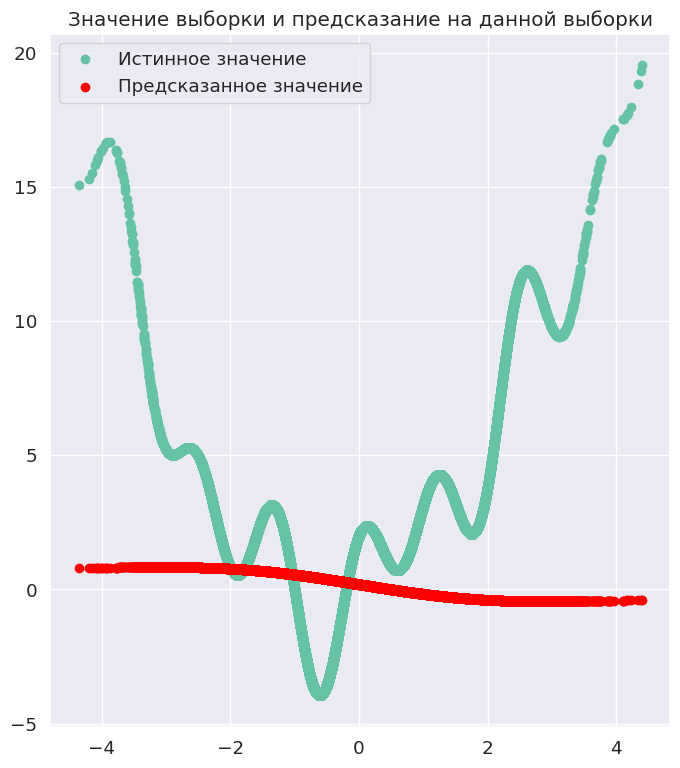

In [12]:
plt.figure(figsize=(8,9))
plt.scatter(X_test, y_test, label='Истинное значение')
plt.scatter(X_test, y_nn, color='red', label='Предсказанное значение')
plt.legend(loc='upper left')
plt.title('Значение выборки и предсказание на данной выборки')
plt.show()

**Вывод:**

В ходе работы были изучены поведение линейной регрессии и двухслойной нейронной сети на нелинейных данных. Заметим, что ошибка при использовании нейронной сети больше, чем при использовании линейной регрессии, однако, ошибка при использовании нейронной сети ожидалась ниже полученной, но это можно объяснить майскими праздниками и дачей без интернета, поэтому пришлось выставить очень большое значение batch, иначе больше 25 минут на одной выборки ждать оказалось невозможным.


Теперь напишем рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. 

In [28]:
import torch

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Linear(1, 10),
            torch.nn.Sigmoid())
        self.layer2 = torch.nn.Linear(10, 1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        return out

Обучим нейросеть на рассмотренных ранее данных. 

In [29]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))

y = np.sin(X[:,0]) + 0.5*np.exp(-X[:,0]**2)
assert y.shape == (sample_size,) 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn1 = NeuralNet()

In [31]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()

In [32]:
optimizer = torch.optim.SGD(nn1.parameters(), lr=0.01)
optim_func = torch.nn.MSELoss()

In [33]:
num_epochs = 100
batch_size = 32
n = len(X_train)
num_batches = n // batch_size
for epoch in range(num_epochs):
  idx = torch.randperm(n)
  for i in range(num_batches):
    batch_idx = idx[i*batch_size:(i+1)*batch_size]
    X_batch = X_train[batch_idx]
    y_batch = y_train[batch_idx]
    y_pred = nn1(X_batch)
    loss = optim_func(y_pred, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [34]:
y_pred = nn1(X_test).detach().numpy()

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [36]:
print(mse)

0.43429385404121407


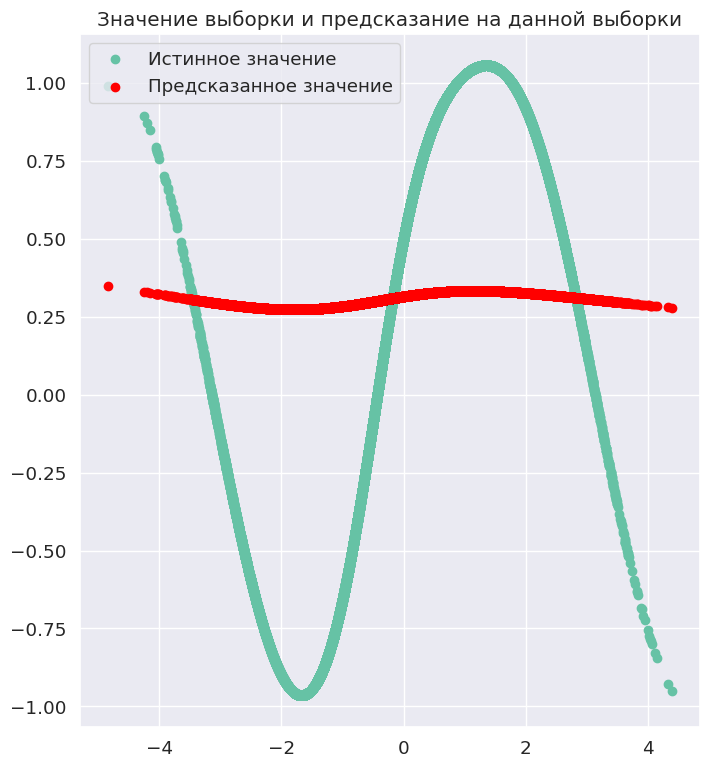

In [39]:
plt.figure(figsize=(8,9))
plt.scatter(X_test, y_test, label='Истинное значение')
plt.scatter(X_test, y_pred, color='red', label='Предсказанное значение')
plt.legend(loc='upper left')
plt.title('Значение выборки и предсказание на данной выборки')
plt.show()


Теперь на других данных:

In [50]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.sin(X[:,0]) + X[:,0]**2 + 0.5*X[:,0] + 1.5*np.sin(3*X[:,0]) + 2*np.cos(5*X[:,0])

assert y.shape == (sample_size,) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
nn1 = NeuralNet()
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
optimizer = torch.optim.SGD(nn1.parameters(), lr=0.01)
optim_func = torch.nn.MSELoss()
num_epochs = 20
batch_size = 64
n = len(X_train)
num_batches = n // batch_size
for epoch in range(num_epochs):
  idx = torch.randperm(n)
  for i in range(num_batches):
    batch_idx = idx[i*batch_size:(i+1)*batch_size]
    X_batch = X_train[batch_idx]
    y_batch = y_train[batch_idx]
    y_pred = nn1(X_batch)
    loss = optim_func(y_pred, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [52]:
y_pred = nn1(X_test).detach().numpy()
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

6.5521130037698185


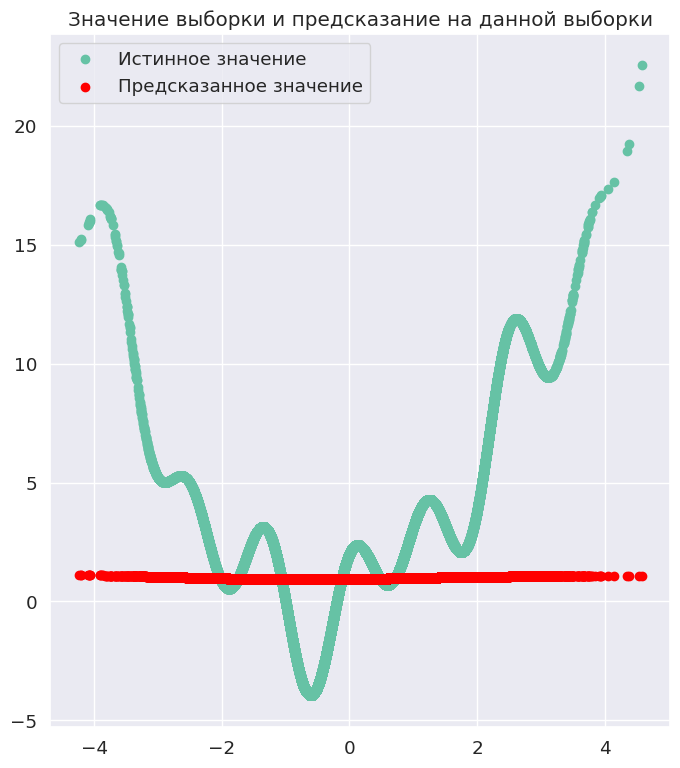

In [53]:
plt.figure(figsize=(8,9))
plt.scatter(X_test, y_test, label='Истинное значение')
plt.scatter(X_test, y_pred, color='red', label='Предсказанное значение')
plt.legend(loc='upper left')
plt.title('Значение выборки и предсказание на данной выборки')
plt.show()

**Вывод:**
Кажется, значения на вторых данных получились плохими из-за не очень хорошего подбора параметров. В ходе работы была построена двухслойная нейросеть, которая была обучена по нелинейным данным, mse=0.43429385404121407.